# 线性回归

Minimal,  System, Insight, Programming

---
## 前言

线性回归是一种应用非常广泛的回归模型：销量预测、网站流量、生物指标预测等。其中包含的一些知识点例如：梯度下降、L1/L2正则化等在其他机器学习、深度学习模型中也会应用，需要认真掌握。本章会以房价预测案例介绍机器学习建模流程，具体内容请下载视频配合Notebook教材使用。

学习目标：
- 线性回归定义
- 梯度下降法求解回归系数
- 常用的回归任务评价指标
- 机器学习建模流程
- 【选修拓展阅读】：过拟合、正则化，多重共线性
- 完成课后QA及代码作业


配套视频：[阿里云盘](https://www.aliyundrive.com/s/TshNFCWFjWz) | [Dropbox](https://www.dropbox.com/s/ec7bn1t77l5yt87/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92-%E6%B0%B4%E5%8D%B0%E8%A7%86%E9%A2%91.mp4?dl=0)

# 线性回归

回归分析是一种预测性的回归建模技术，它研究的是因变量（目标）和自变量（特征）之间的关系，用于预测各种连续变量的值，例如通过父亲的身高、母亲的身高、家庭收入等预测同学的身高，通过地段、面积等预测房屋价格。 线性回归基于简单的假设： 假设自变量和因变量之间的关系是线性的， 即因变量可以表示为自变量中元素的加权和.

我们把特征表示为向量$x = (x_1, x_2, ..., x_m)$，加权权重表示为向量$w=(w_1, w_2, ..., w_m)$，再添加一个偏置项$b$，线性回归模型可以表示为:

$$y = w^T  x + b$$

为了方便表示，我们把偏置项也移动到特征里，作为$x_0$，且其值总为1，也为偏置项增加一个权重$w_0$，那么线性回归可以表示为：

$$y = w^T x$$

这样就简洁多了，现在问题来了，如何求解影响权重$w$呢，因为影响因素的值我们是已知的，只要知道权重，我们就可以通过模型得到一个预测结果。

## 误差函数

一个很自然的想法是，我们首先定义个误差函数，去求解这个误差函数最小的时候所对应的$W$就可以了。其中对于一个回归问题，我们通常采用MSE(Mean Square Error)作为误差函数：

$$MSE = \frac{1}{n} \sum_{1}^{n}(y\_true^{(i)} - w^Tx^{(i)})^2$$

其中n为样本数量，$y\_true^i$为第$i$个样本的真实值，$w^Tx^{(i)}$为线性回归模型的预测值。注意到，我们的误差函数MSE是一个关于$w$可导的函数，因此我们可以通过梯度下降的方法，去求解使得误差函数最小时的$w$。

## 梯度下降

[梯度下降直观理解小视频](https://www.zhihu.com/zvideo/1439972345990045697)

**梯度**是函数关于参数的徧导数，这里以我们的MSE函数为例，$grad = \frac{\partial{MSE}}{\partial{w}}$,表示函数的某处最小值到最大值的指向与最大值与最小值的差异程度。那么意味着梯度不仅告诉我们，函数变大的方向，也告诉了我们变大的程度。我们的函数（MSE）是越小越好，那么我们只要朝着梯度的反方向迈进就可以了。



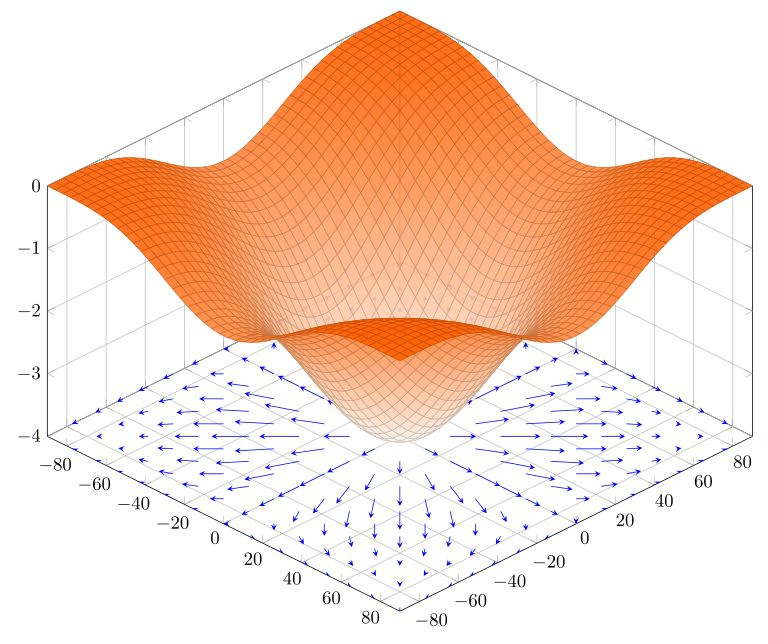

在上图中，我们绘制了一个函数 $func(x_1, x_2)$，其中底部的两个坐标为$x_1, x_2$，纵轴坐标为函数对应的取值，底部的箭头是在不同$x_1, x_2$取值下的梯度。可以看到，梯度总是指向让函数取值变大的方向，梯度的箭头越长意味着变化越大。因此，我们只需要让$x_1, x_2$的取值，不断朝着梯度的反方向更新，就可以一步步走向函数的最低点。

利用求导公式可知,梯度等于:
$$\frac{\partial{MSE}}{\partial{w_i}} = - 1/n * \sum_{j=1}^{j=n} 2 * (y_{i}^{(j)}-w_ix_i^{(j)}) *x_i^{(j)}$$

那么，在线性回归中，我们可以沿着梯度的反方向进行更新：

$$w_i = w_i - learning\_rate * \frac{\partial{MSE}}{\partial{w_i}}$$


下面我们就利用梯度下降，来解决一个房价预测的问题。

In [1]:
import numpy as np

x = np.array([1, 2, 1.2, 1.5])
y = x * 2 + np.random.randn(4)

print("假设我们有一组房屋的面积数据：")
print(x)
print("其对应的房屋价格：")
print(y)

假设我们有一组房屋的面积数据：
[1.  2.  1.2 1.5]
其对应的房屋价格：
[1.74291921 2.60986369 1.90113951 5.19479432]


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'house price')

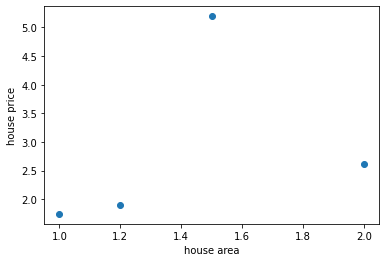

In [3]:
# 房屋面积和房价可以从散点图看出具备某种线性关系
plt.scatter(x, y)
plt.xlabel("house area")
plt.ylabel("house price")

In [4]:
# 定义我们的误差函数
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 定义梯度的计算公式
def grad(y_true, w, x):
    return np.mean(2 * (y_true - w*x) * -x)

# 定义梯度下降迭代过程
def grad_decent(y_true, w, x, learning_rate):
    w = w - learning_rate * grad(y_true, w, x)
    return w

w = np.random.rand()  # w赋值一个随机初始值
learning_rate = 0.001
num_iteration = 2000
loss = []

for step in range(num_iteration):
    w = grad_decent(y, w, x, learning_rate)
    loss_step = mse(y, w*x)
    loss.append(loss_step)

Text(0, 0.5, 'mse_loss')

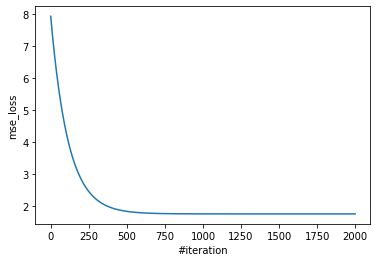

In [5]:
plt.plot(loss)
plt.xlabel("#iteration")
plt.ylabel("mse_loss")

随着迭代次数增加，可以观察到误差函数逐渐趋近于0，说明我们学习到了一个合理的参数$w$，使得误差最小。让我们来观察一下模型预测和真实值的对比。

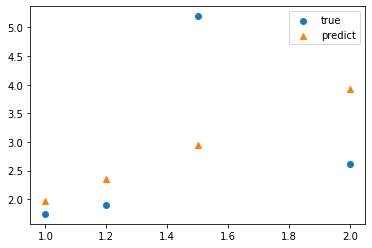

In [6]:
plt.scatter(x, y, label="true")
plt.scatter(x, w*x, label="predict", marker="^")
plt.legend()

可以观察到，预测结果比较好的拟合了样本点。

# 回归问题常见的评价函数

## 1. MAE, mean absolutely error

$$ mae(y, y_{pred}) = abs(y-y_{pred})$$

计算简单，但是在0处不可导，所以在使用梯度下降需要特殊处理，值越大则误差越大，值域在0到正无穷大。我们用$mae$来计算一下之前的预测误差:

In [8]:
y_pred = w * x

from sklearn.metrics import mean_absolute_error as mae

mae(y, y_pred)

1.0583247762550771

## 2. MSE,  mean squared error

在梯度下降已经介绍，这里直接计算：

In [9]:
from sklearn.metrics import mean_squared_error as mse

mse(y, y_pred)

1.762738215343171

领域基于MSE，也有一些衍生指标，比如$RMSE$，就是对$MSE$开根号，这里不再详述。

## 3. R square （决定系数或R方）

统计领域常用，但是在机器学习领域用的很少的一种回归评价指标，值域在负无穷大到1，越接近1越好，代表预测值对真实值解释程度越高。

$$R^2 = 1 - \frac{残差平方和}{总平方和} = 1 - \frac{\sum (y_i - y\_pred_i)^2}{\sum (y_i - \hat{y})^2}$$

其中$\hat{y}$是真实值的平均数,$y_i$为第i个样本真实值。

In [10]:
from sklearn.metrics import r2_score as r2

r2(y, y_pred)

0.08203825659967734

## 机器学习建模流程

我们以[Kaggle房价预测竞赛](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)为例，利用线性回归，搭建一套完整的机器学习建模流程，**代码请务必配合文章开头给出的视频一起理解**。

1. 加载数据&分析
2. 数据处理
3. 特征工程
4. 数据划分｜[辅助阅读内容](https://zhuanlan.zhihu.com/p/35394638)
5. 模型训练
6. 模型评估

### 数据

In [48]:
!ls .   # Mac/linux环境支持命令，查看当前路径下文件

 assets					      '线性回归&机器学习建模流程.ipynb'
 house-prices-advanced-regression-techniques   逻辑回归和最大似然估计.ipynb
 决策树.ipynb


In [49]:
!ls ./house-prices-advanced-regression-techniques  # Mac/linux环境支持命令，查看指定路径下文件

data_description.txt  sample_submission.csv  test.csv  train.csv


In [50]:
train = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv")
sample_submission = pd.read_csv("./house-prices-advanced-regression-\
techniques/sample_submission.csv")

In [51]:
train.shape

(1460, 81)

In [52]:
test.shape

(1459, 80)

In [53]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [54]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [56]:
# 将预测目标 SalePrice 取出

target = train.SalePrice.values
test_ids = test.Id.values

train.drop(['SalePrice', "Id"], axis=1, inplace=True)
test.drop(["Id"], axis=1, inplace=True)

In [57]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [58]:
num_train = len(train)

In [61]:
# 合并训练 & 测试数据，方便数据处理时同时处理两部分数据

data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [62]:
data.shape

(2919, 79)

In [63]:
data.dtypes.value_counts()

object     43
int64      25
float64    11
dtype: int64

<AxesSubplot:>

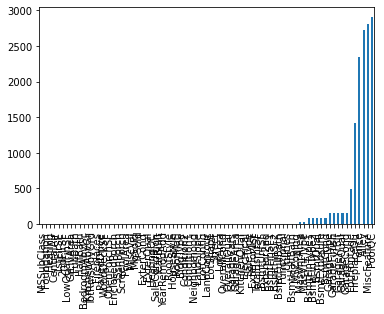

In [66]:
# 查看数据集中每个特征缺失值个数

data.isnull().sum().sort_values().plot(kind="bar")

In [69]:
# 丢弃缺失比例>80% 的特征

data.drop(data.isnull().mean()[data.isnull().mean() > 0.8].index.tolist(), axis=1,\
          inplace=True)

In [77]:
# 对数据类别非object (字符串等)特征，使用中位数填充缺失值

data.loc[:, data.dtypes[data.dtypes != "object"].index] = \
data.loc[:, data.dtypes[data.dtypes != "object"].index].fillna(
    data.loc[:, data.dtypes[data.dtypes != "object"].index].median())

In [78]:
# 数据类型为object (字符串等)特征，使用“NULL” 填充缺失值

data.loc[:, data.dtypes[data.dtypes == "object"].index] = \
data.loc[:, data.dtypes[data.dtypes == "object"].index].fillna("NULL")

In [80]:
data.isnull().sum().sum()

0

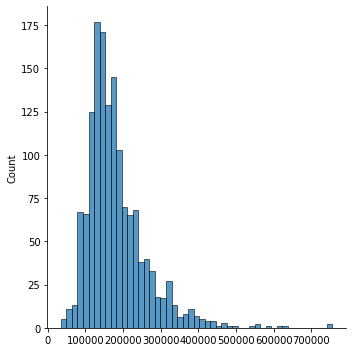

In [82]:
import seaborn as sns

# 观察预测目标分布
sns.displot(target)

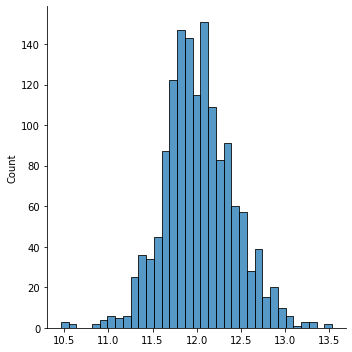

In [83]:
# 观察对数化后的预测目标分布，可以发现log后更接近正态分布

sns.displot(np.log1p(target))

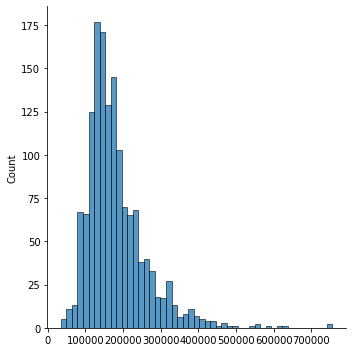

In [84]:
# np.log1p = log(1+x) 
# np.expm1 = exp(x) - 1
# 以上操作互为逆，因此我们可以通过expm1将对数化后的目标值恢复成原值

sns.displot(np.expm1(np.log1p(target)))

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
# 所有object类别特征(字符串等) 使用onehot处理
# 什么是onehot : https://zhuanlan.zhihu.com/p/37471802
# 可结合教材视频一起理解

cat_feature = OneHotEncoder().fit_transform(data[data.columns\
                                                 [data.dtypes =="object"]])

In [87]:
cat_feature.shape

(2919, 258)

In [93]:
cat_feature[0].todense()

matrix([[0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
         1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
# 对数值型变量做标准化操作， （x - mean）/ std

num_feature = StandardScaler().fit_transform(data[data.columns\
                                                  [data.dtypes !="object"]])

In [99]:
num_feature.mean(0)

array([ 3.95557364e-17,  2.40985717e-16,  3.40787883e-17, -1.66742643e-16,
        3.02449246e-16, -5.56214509e-16,  6.81575766e-16,  4.38155849e-17,
       -5.11181824e-17,  7.05917757e-17,  1.30229655e-16,  1.55788746e-16,
       -1.29012556e-16, -2.19077925e-17, -2.19077925e-17,  1.43617751e-16,
        7.85029230e-17, -9.73679665e-18,  7.05917757e-17, -2.55590912e-17,
        2.54373813e-16, -5.24569920e-16,  2.53156713e-16,  5.35523816e-17,
        1.61874244e-16,  1.32663854e-16, -5.90293297e-17, -2.79932904e-17,
       -4.25984854e-17,  6.69404770e-17, -1.21709958e-17,  6.32891782e-17,
        2.43419916e-18,  4.86839833e-18,  1.24144157e-16,  6.49310456e-14])

In [100]:
num_feature.std(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [102]:
# 合并onehot特征和数值变量特征

feature = np.concatenate([cat_feature.todense(), num_feature], axis=1)

In [103]:
feature.shape

(2919, 294)

In [104]:
test_feature = feature[num_train:]
train_feature = feature[:num_train]

In [110]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [111]:
target

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [112]:
target_log1p = np.log1p(target)

In [113]:
target_log1p

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [114]:
scaler = StandardScaler()

In [116]:
scaler.fit(target_log1p.reshape(-1, 1))

StandardScaler()

In [125]:
target_log1p_scale = scaler.transform(target_log1p.reshape(-1, 1))

In [127]:
target_log1p_scale.mean()


-3.989502792050288e-15

In [128]:
target_log1p_scale.std()


1.0

In [146]:
model = Ridge()

In [147]:
model.fit(train_feature, target_log1p_scale)

Ridge()

In [148]:
def predict(model, feature):
    pred = model.predict(feature)
    pred = scaler.inverse_transform(pred)
    pred = np.expm1(pred)
    return pred

In [149]:
train_pred = predict(model, train_feature)

In [150]:
train_pred

array([[206382.66082058],
       [198677.95982614],
       [215616.88626543],
       ...,
       [270036.39109799],
       [147023.55154021],
       [141938.58271971]])

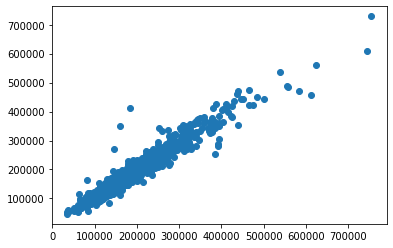

In [152]:
plt.scatter(target.reshape(-1), train_pred)

In [153]:
from sklearn.metrics import mean_squared_error as mse

In [156]:
np.sqrt(mse(target, train_pred))

20127.15626052778

In [157]:
test_pred = predict(model, test_feature)

In [158]:
test_pred

array([[117691.8929806 ],
       [147615.27260962],
       [177514.29653278],
       ...,
       [163058.27680056],
       [113278.63508739],
       [219893.71632144]])

In [160]:
sample_submission["SalePrice"] = test_pred.reshape(-1)

In [163]:
sample_submission.to_csv("submission.csv", index=False)

In [162]:
sample_submission.head()

,Id,SalePrice
0,1461,117691.892981
1,1462,147615.272610
2,1463,177514.296533
3,1464,197428.177930
4,1465,199077.141265


#  模型正则化

## 过拟合与欠拟合，模型能力的权衡

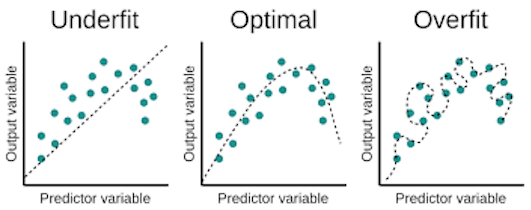


## L1&L2 正则化

通过在误差函数中添加关于参数的1阶或2阶模，达到限制模型能力的作用。

$$L1  = MSE + \sum|w_i|$$

$$L2 = MSE + \sum{w_i^2}$$

其中L1正则化线性回归叫做Lasso, L2正则化线性回归叫做Ridge.在sklearn中可以很方便的调用。


```python


from sklearn.linear_model import Ridge, Lasso, LinearRegression

```


## L1&L2如何发挥作用？

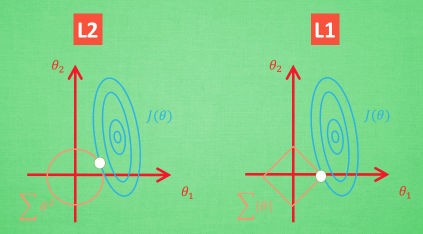


# 拓展阅读

- [欠拟合、过拟合及如何防止过拟合](https://zhuanlan.zhihu.com/p/72038532)
- [机器学习中常常提到的正则化到底是什么意思？](https://www.zhihu.com/question/20924039/answer/240037674)
- [多重共线性问题](https://zhuanlan.zhihu.com/p/151636748)



## 作业


1. 回答L1与L2正则化的线性回归分别具备什么特性？


2. 注册[Kaggle平台](https://www.kaggle.com/competitions)，[阅读文档了解Kaggle平台使用](https://www.aliyundrive.com/s/Ug7qotyCN12)，参加[Kaggle房价预测竞赛](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)，分别采用普通LinearRegression/Ridge（L2正则化线性回归）/Lasso（L1正则化线性回归）进行建模，尝试构造更多的特征，对比三种模型精度，最优模型Kaggle提交得分低于0.14。